In [2]:
# installing dependencies
!pip install pandas 
!pip install scikit-learn
!pip install matplotlib
!pip install torch torchvision torchaudio
!pip install statsmodels


# Data exploration

In [80]:
import pandas as pd 
insurance_data=pd.read_csv(r"path_to_data\insurance_data_sample.csv")
print(len(insurance_data))

23906


In [81]:
insurance_data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.0,Riga
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.0,Liepaja
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.0,Riga
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.0,Jelgava
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.0,Liepaja


In [82]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_id                     23906 non-null  object 
 1   Date                       23906 non-null  object 
 2   Customer Name              23905 non-null  object 
 3   Gender                     23906 non-null  object 
 4   Annual Income              23906 non-null  int64  
 5   Dealer_Name                23906 non-null  object 
 6   Company                    23906 non-null  object 
 7   Model                      23906 non-null  object 
 8   Engine                     23906 non-null  object 
 9   Transmission               23906 non-null  object 
 10  Color                      23906 non-null  object 
 11  Price ($)                  23906 non-null  int64  
 12  Dealer_No                  23906 non-null  object 
 13  Body Style                 23906 non-null  obj

In [83]:
insurance_data.nunique() 

Car_id                       23906
Date                           612
Customer Name                 3021
Gender                           2
Annual Income                 2508
Dealer_Name                     28
Company                         30
Model                          154
Engine                           2
Transmission                     2
Color                            3
Price ($)                      870
Dealer_No                        7
Body Style                       5
Phone                        23804
Amount_paid_for_insurance     3421
Claim amount                   230
City                             6
dtype: int64

In [84]:
# Dataset Description
# The dataset contains the following:
#  ---------- columns:

# Car_id: A unique identifier for each car transaction.
# Date: The date of the transaction, in the format DD/MM/YYYY.
# Customer Name: The name of the customer who purchased the car.
# Gender: The gender of the customer (e.g., Male, Female).
# Annual Income: The annual income of the customer in dollars.
# Dealer_Name: The name of the dealership where the car was purchased.
# Company: The manufacturer of the car (e.g., Ford, Dodge).
# Model: The specific model of the car (e.g., Expedition, Durango).
# Engine: The type of engine in the car (e.g., Double Overhead Camshaft).
# Transmission: The type of transmission in the car (e.g., Auto).
# Color: The color of the car.
# Price ($): The price of the car in dollars.
# Dealer_No: The identification number of the dealer.
# Body Style: The body style of the car (e.g., SUV).
# Phone: The phone number of the customer.
# Amount_paid_for_insurance: The amount paid by the customer for car insurance in dollars.
# Claim amount: The amount claimed by the customer from insurance in dollars.
# City: The city where the transaction took place.

# ---------- Data Types:

# Car_id: Object (string)
# Date: Object (string, to be converted to datetime)
# Customer Name: Object (string)
# Gender: Object (string)
# Annual Income: Integer
# Dealer_Name: Object (string)
# Company: Object (string)
# Model: Object (string)
# Engine: Object (string)
# Transmission: Object (string)
# Color: Object (string)
# Price ($): Integer
# Dealer_No: Object (string)
# Body Style

In [85]:
insurance_data=insurance_data.drop(columns=['Car_id',"Customer Name","Color"])

In [86]:
insurance_data["insurance_gains"]=insurance_data["Amount_paid_for_insurance"]-insurance_data["Claim amount"]

In [87]:
insurance_data["insurance_gains"]

0        1665.0
1        -568.0
2        1897.0
3        1176.0
4       -1127.0
          ...  
23901    -508.0
23902    1072.0
23903    1061.0
23904   -1178.0
23905    1492.0
Name: insurance_gains, Length: 23906, dtype: float64

In [88]:
insurance_data.nunique() 

Date                           612
Gender                           2
Annual Income                 2508
Dealer_Name                     28
Company                         30
Model                          154
Engine                           2
Transmission                     2
Price ($)                      870
Dealer_No                        7
Body Style                       5
Phone                        23804
Amount_paid_for_insurance     3421
Claim amount                   230
City                             6
insurance_gains               4791
dtype: int64

# logistic regression
predict of the insurance_gains from the client aare going to be positive depending on the client information

first we group by client name and add the insurance gains

In [89]:
logistic_regression_df=insurance_data.copy()

In [90]:
# here i group by phone because it is more unique than the customer name (ideally consderated as a customer id)
# i used first to see at the entrance level what features the client had and sum in the gains to know if that customer is going to be making the insurance gain money or not in the future
aggregated = logistic_regression_df.groupby('Phone').agg({
    'Gender': 'first',
    'Annual Income': 'first',
    'Dealer_Name': 'first',
    'Company': 'first',
    'Model': 'first',
    'Engine': 'first',
    'Transmission': 'first',
    'Price ($)': 'first',
    'Body Style': 'first',
    'insurance_gains': 'sum',
    'City': 'first'
})

In [91]:
X=aggregated.drop(columns=["insurance_gains"])
Y=aggregated["insurance_gains"].apply(lambda x: 1 if x>0 else 0 )

In [92]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_preprocessed  = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.2, random_state=42)


In [94]:
import torch
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [144]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the Model
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the Model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predicted = train_outputs.round()
    train_precision = precision_score(y_train_tensor, train_predicted)
    train_recall = recall_score(y_train_tensor, train_predicted)
    train_f1 = f1_score(y_train_tensor, train_predicted)
    train_accuracy = (train_predicted.eq(y_train_tensor).sum() / float(y_train_tensor.shape[0])).item()
    
    test_outputs = model(X_test_tensor)
    test_predicted = test_outputs.round()
    test_precision = precision_score(y_test_tensor, test_predicted)
    test_recall = recall_score(y_test_tensor, test_predicted)
    test_f1 = f1_score(y_test_tensor, test_predicted)
    test_accuracy = (test_predicted.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()

print(f'Train Precision: {train_precision:.4f}')
print(f'Train Recall: {train_recall:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')

print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Epoch [100/1000], Loss: 0.4359
Epoch [200/1000], Loss: 0.3685
Epoch [300/1000], Loss: 0.3452
Epoch [400/1000], Loss: 0.3355
Epoch [500/1000], Loss: 0.3311
Epoch [600/1000], Loss: 0.3289
Epoch [700/1000], Loss: 0.3277
Epoch [800/1000], Loss: 0.3271
Epoch [900/1000], Loss: 0.3267
Epoch [1000/1000], Loss: 0.3265
Train Precision: 0.8997
Train Recall: 1.0000
Train F1 Score: 0.9472
Test Precision: 0.9021
Test Recall: 1.0000
Test F1 Score: 0.9485


# Gains/Risk forecasting

In [96]:
forecasting_data=insurance_data.copy()

In [130]:
forecasting_data=forecasting_data.groupby('Date').agg({
    'insurance_gains': 'sum',
}).sort_values(by='Date').reset_index()
forecasting_data=forecasting_data.set_index('Date')
forecasting_data.index = pd.to_datetime(forecasting_data.index)
y=forecasting_data['insurance_gains'].resample('M').sum()

In [141]:
y

Date
2022-01-31     437937.0
2022-02-28     436501.0
2022-03-31     944490.0
2022-04-30    1143627.0
2022-05-31     966772.0
2022-06-30     948777.0
2022-07-31     992243.0
2022-08-31    1128900.0
2022-09-30    2064588.0
2022-10-31    1193072.0
2022-11-30    2229396.0
2022-12-31    2209514.0
2023-01-31     632078.0
2023-02-28     575033.0
2023-03-31    1106414.0
2023-04-30    1172629.0
2023-05-31    1553282.0
2023-06-30    1402500.0
2023-07-31    1425756.0
2023-08-31    1191904.0
2023-09-30    2506797.0
2023-10-31    1346660.0
2023-11-30    2546429.0
2023-12-31    2645036.0
Freq: M, Name: insurance_gains, dtype: float64

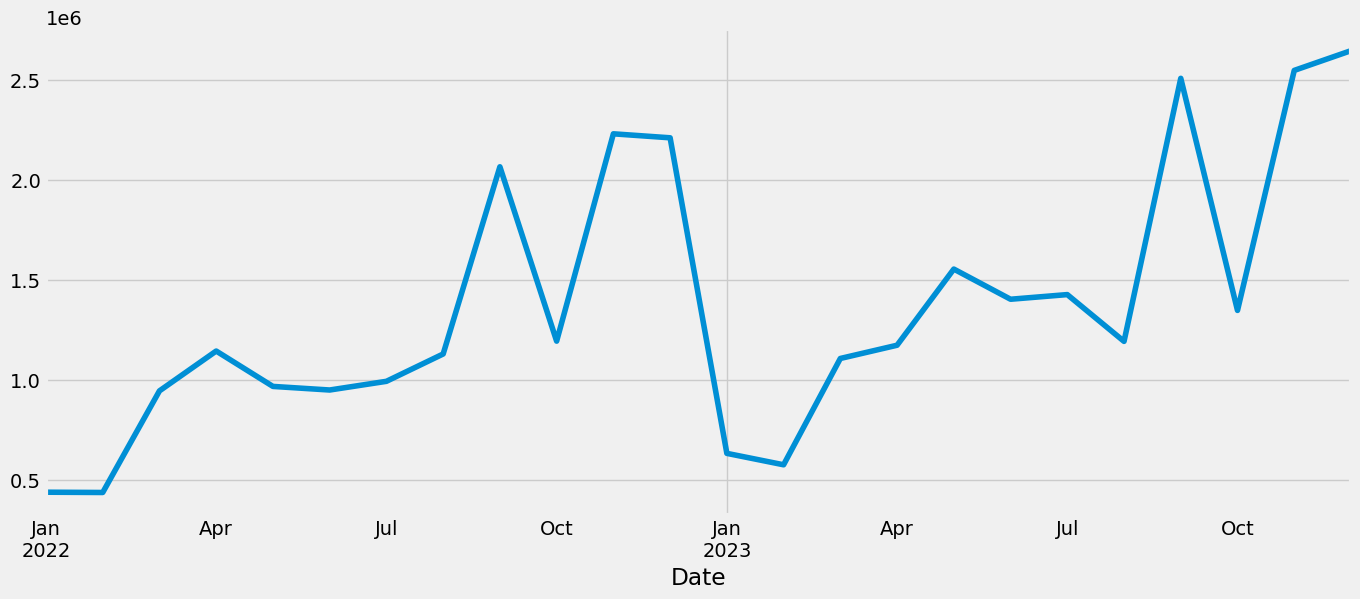

In [131]:
import matplotlib.pyplot as plt

y.plot(figsize=(15, 6))
plt.show()

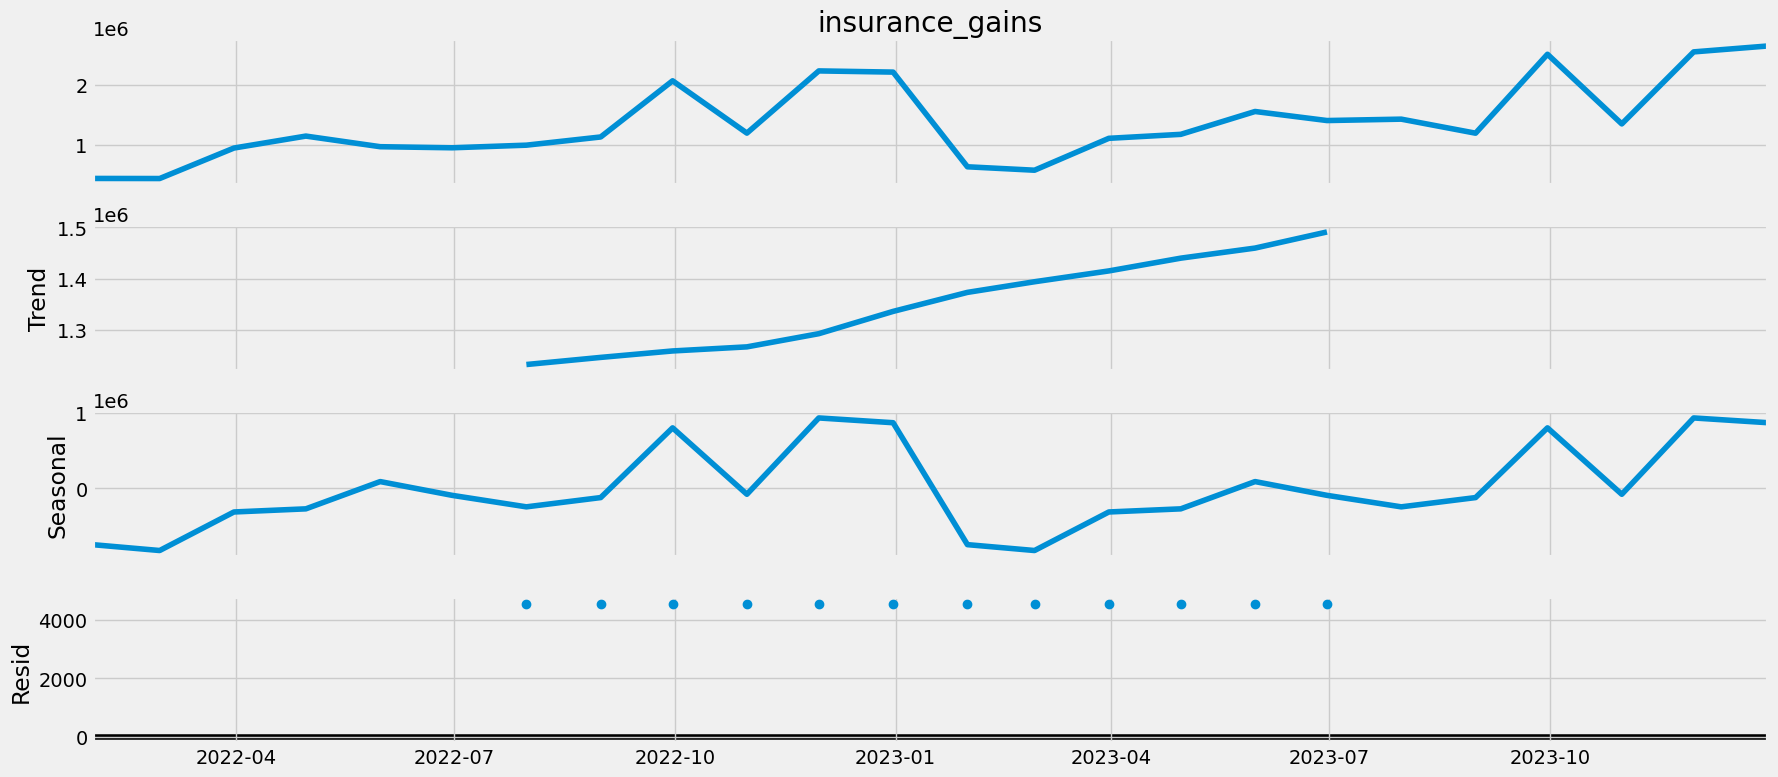

In [132]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [133]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [134]:
import warnings
warnings.filterwarnings("ignore")
best_accuracy=9999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic<best_accuracy:
              best_accuracy=results.aic
              best_params=param
              best_param_seasonal=param_seasonal
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:722.7553730882132
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:319.13959844484896
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:317.7002198860591
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:328.3311293647611
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:321.13957135880634
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:683.4366263856839
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:310.3623334237703
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:286.0453880518032
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:371.20920752059135
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:312.3623137694501
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:656.3051447455277
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:291.7582426657253
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:286.00368819073094
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AI

In [135]:
print('ARIMA{}x{}12 - AIC:{}'.format(best_params, best_param_seasonal, best_accuracy))

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0


In [136]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_params,
                                seasonal_order=best_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2      2.821e+10         -0       -inf      0.000    2.82e+10    2.82e+10


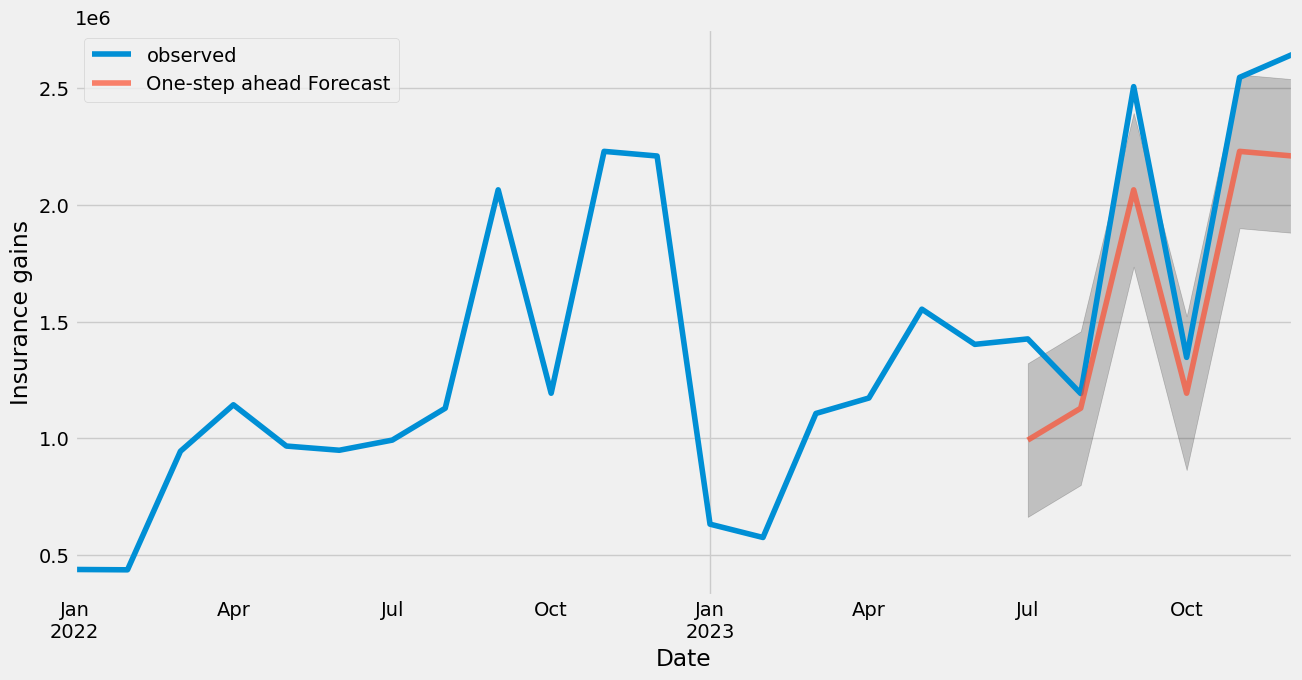

In [145]:
pred = results.get_prediction(start=pd.to_datetime('2023-07-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Insurance gains')
plt.legend()
plt.show()